In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis, norm

import plotly.express as px

In [42]:
df = pd.read_csv(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\DS salary\Data\ds_salaries.csv")
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df[['salary_in_usd','remote_ratio']].describe()

,salary_in_usd,remote_ratio
count,3755.000000,3755.000000
mean,137570.389880,46.271638
std,63055.625278,48.589050
min,5132.000000,0.000000
25%,95000.000000,0.000000
50%,135000.000000,0.000000
75%,175000.000000,100.000000
max,450000.000000,100.000000


In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(df[categorical_cols].nunique())

experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
company_location      72
company_size           3
dtype: int64


Value counts for work_year:
2023    0.475366
2022    0.443142
2021    0.061252
2020    0.020240
Name: work_year, dtype: float64

..........................................
N_unique :  4


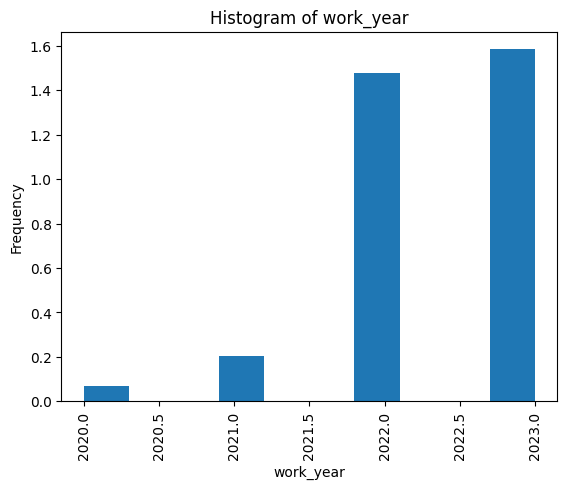

Value counts for experience_level:
SE    0.670040
MI    0.214381
EN    0.085220
EX    0.030360
Name: experience_level, dtype: float64

..........................................
N_unique :  4


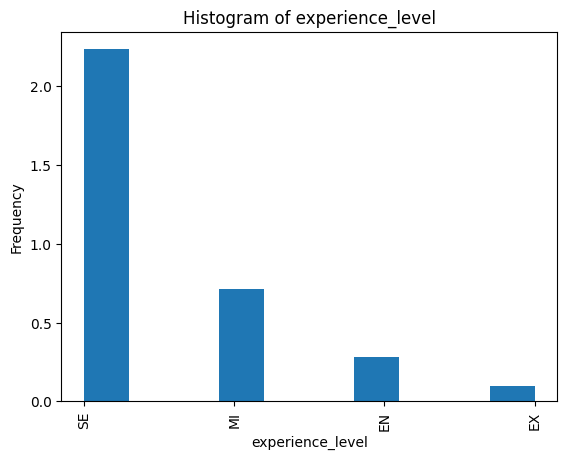

Value counts for employment_type:
FT    0.990146
PT    0.004527
CT    0.002663
FL    0.002663
Name: employment_type, dtype: float64

..........................................
N_unique :  4


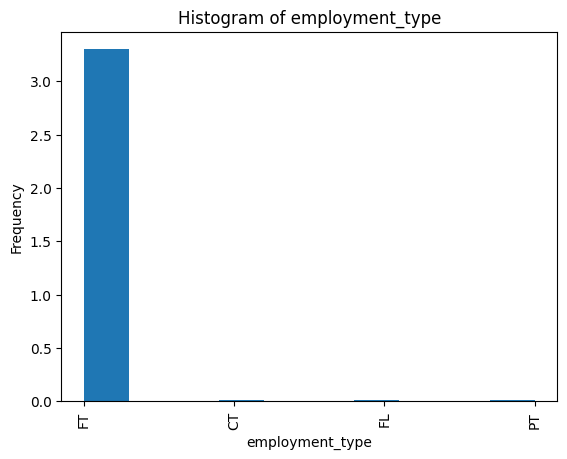

Value counts for salary:
100000    0.029827
150000    0.026631
120000    0.026365
160000    0.022636
130000    0.022636
            ...   
241871    0.000266
93919     0.000266
385000    0.000266
225900    0.000266
412000    0.000266
Name: salary, Length: 815, dtype: float64

..........................................
N_unique :  815


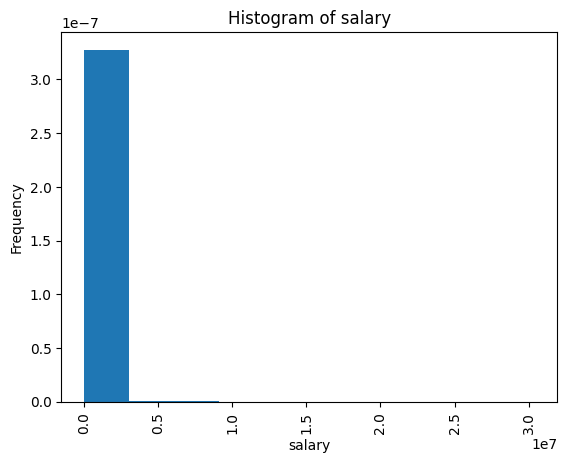

Value counts for salary_in_usd:
100000    0.026365
150000    0.026099
120000    0.024234
160000    0.022370
130000    0.021838
            ...   
234100    0.000266
223800    0.000266
172100    0.000266
232200    0.000266
94665     0.000266
Name: salary_in_usd, Length: 1035, dtype: float64

..........................................
N_unique :  1035


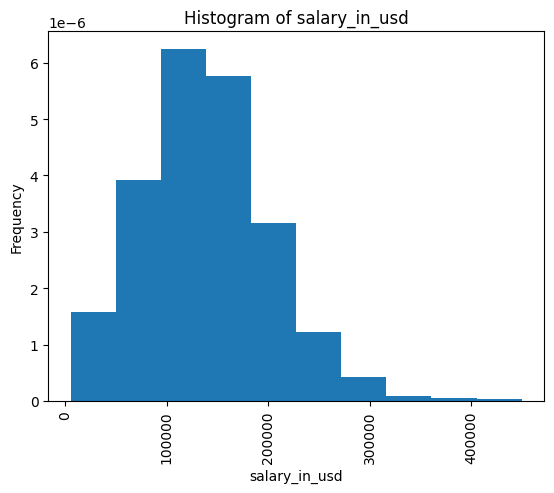

Value counts for remote_ratio:
0      0.512117
100    0.437550
50     0.050333
Name: remote_ratio, dtype: float64

..........................................
N_unique :  3


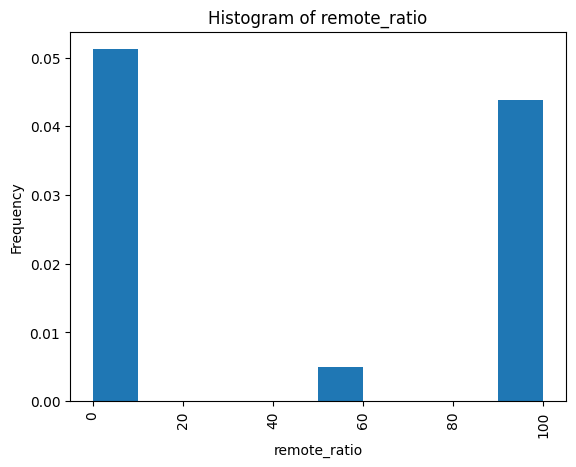

Value counts for company_size:
M    0.839680
L    0.120905
S    0.039414
Name: company_size, dtype: float64

..........................................
N_unique :  3


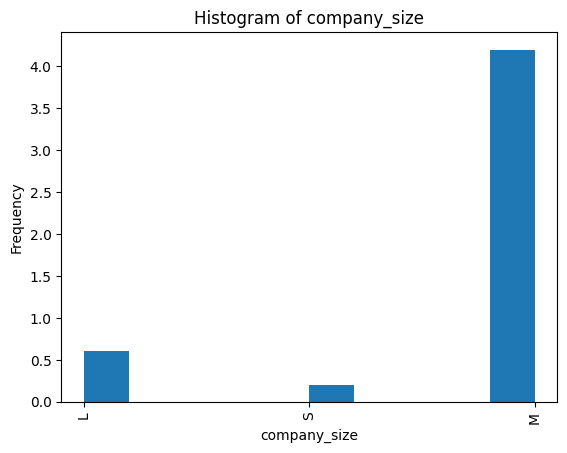

col More than unique 10 :  ['job_title' 'salary_currency' 'employee_residence' 'company_location']


In [7]:
More_than_unique_10=np.array([])
for col in df.columns:
    if df[col].nunique() < 10 or df[col].dtype == 'int64':
        value_counts = df[col].value_counts(normalize=True)
        print(f"Value counts for {col}:\n{value_counts}\n")
        print('..........................................')
        print('N_unique : ',df[col].nunique())
        plt.hist(df[col], density=True)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation='vertical')
        plt.show()
    else :
        More_than_unique_10=np.append(More_than_unique_10,col)

print("col More than unique 10 : ",More_than_unique_10) 
        
    

Value counts for job_title:
Data Engineer                          0.276964
Data Scientist                         0.223702
Data Analyst                           0.162983
Machine Learning Engineer              0.076964
Analytics Engineer                     0.027430
                                         ...   
Principal Machine Learning Engineer    0.000266
Azure Data Engineer                    0.000266
Manager Data Management                0.000266
Marketing Data Engineer                0.000266
Finance Data Analyst                   0.000266
Name: job_title, Length: 93, dtype: float64



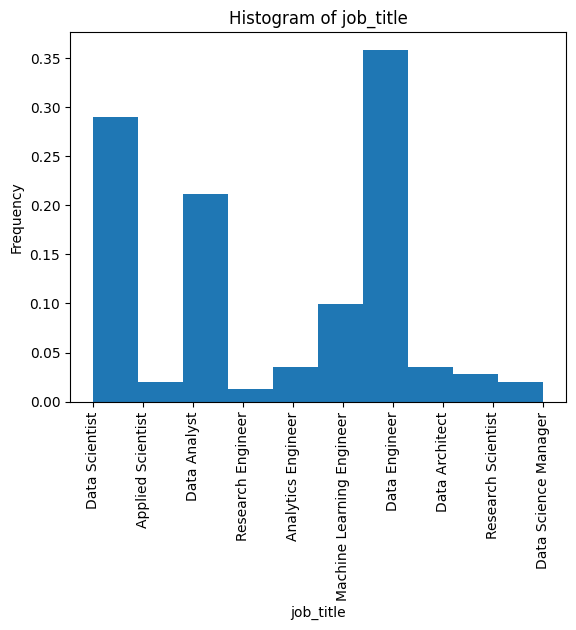

Value counts for salary_currency:
USD    0.858589
EUR    0.062850
GBP    0.042876
INR    0.015979
CAD    0.006658
AUD    0.002397
SGD    0.001598
BRL    0.001598
PLN    0.001332
CHF    0.001065
HUF    0.000799
DKK    0.000799
JPY    0.000799
TRY    0.000799
THB    0.000533
ILS    0.000266
HKD    0.000266
CZK    0.000266
MXN    0.000266
CLP    0.000266
Name: salary_currency, dtype: float64



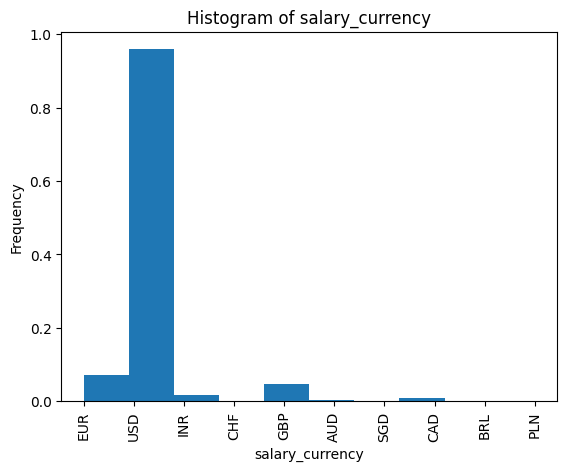

Value counts for employee_residence:
US    0.800000
GB    0.044474
CA    0.022636
ES    0.021305
IN    0.018908
        ...   
BA    0.000266
AM    0.000266
CY    0.000266
KW    0.000266
MT    0.000266
Name: employee_residence, Length: 78, dtype: float64



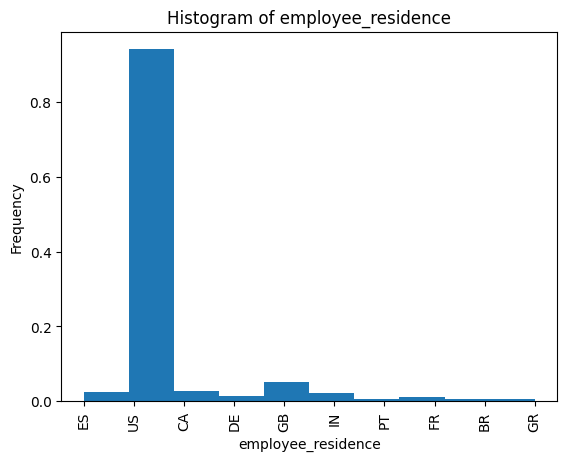

Value counts for company_location:
US    0.809587
GB    0.045806
CA    0.023169
ES    0.020506
IN    0.015446
        ...   
MK    0.000266
BS    0.000266
IR    0.000266
CR    0.000266
MT    0.000266
Name: company_location, Length: 72, dtype: float64



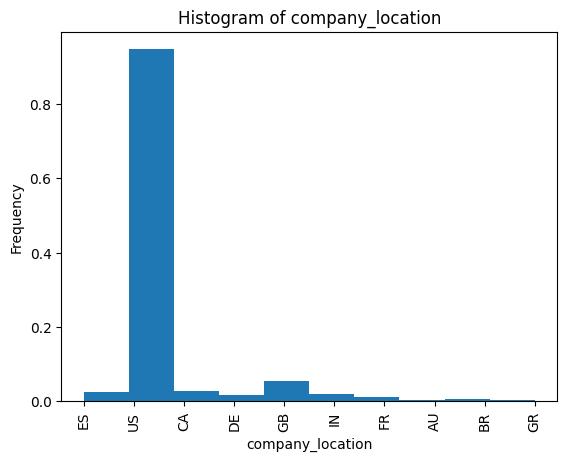

In [8]:
for col in More_than_unique_10:
    value_counts = df[col].value_counts(normalize=True)
    print(f"Value counts for {col}:\n{value_counts}\n")
    top_10 = value_counts[:10]
    values_to_plot = top_10.index.tolist()

    if values_to_plot:
        plt.hist(df[df[col].isin(values_to_plot)][col], density=True)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.xticks(rotation='vertical')
        plt.ylabel("Frequency")
        plt.show()

Plot Realtion Salary and job title

In [9]:
top_10_job_titles = df['job_title'].value_counts().nlargest(10).index.tolist()
df_10_job_title = df[df['job_title'].isin(top_10_job_titles)]
df_10_job_title

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


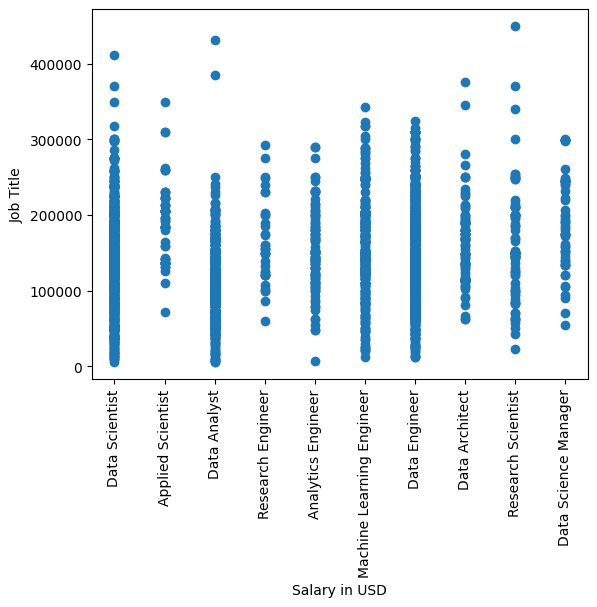

In [10]:
plt.scatter(df_10_job_title['job_title'], df_10_job_title['salary_in_usd'])
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.xticks(rotation='vertical')
plt.show()

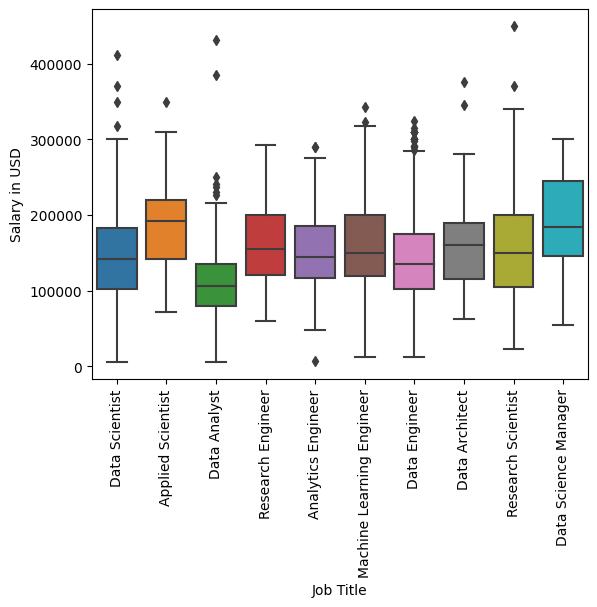

In [11]:
import seaborn as sns

sns.boxplot(x='job_title', y='salary_in_usd', data=df_10_job_title)
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

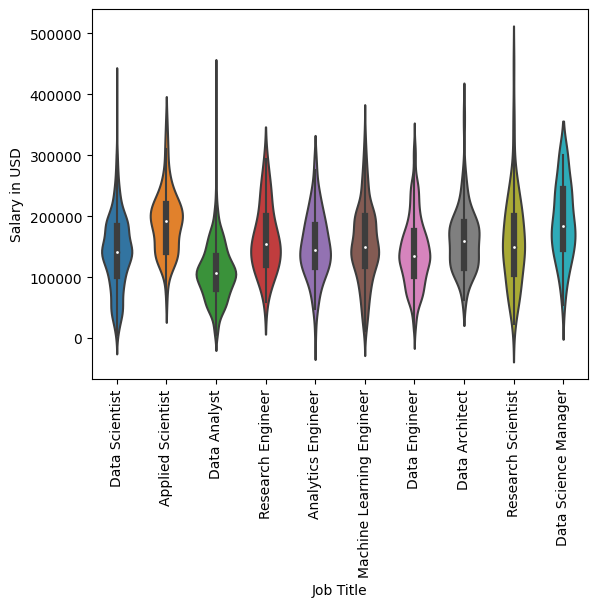

In [12]:
sns.violinplot(x='job_title', y='salary_in_usd', data=df_10_job_title)
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

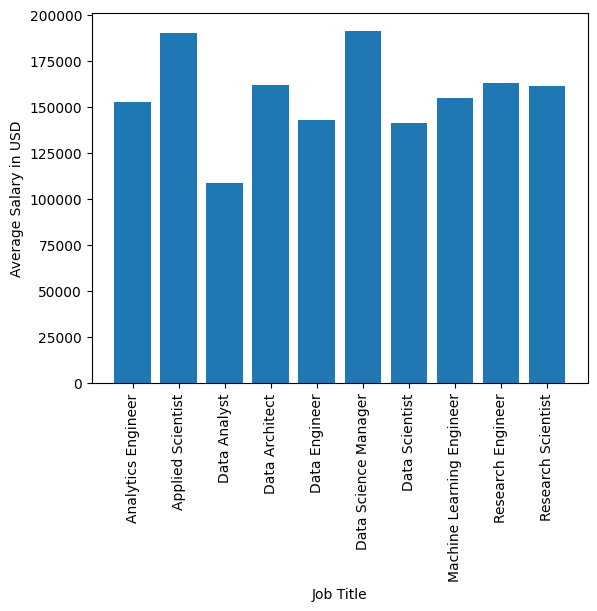

In [13]:
grouped_data = df_10_job_title.groupby('job_title')['salary_in_usd'].mean().reset_index()

plt.bar(grouped_data['job_title'], grouped_data['salary_in_usd'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

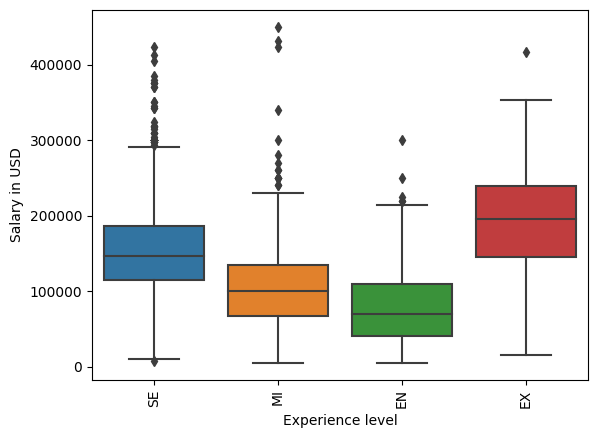

In [14]:
import seaborn as sns

sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience level')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

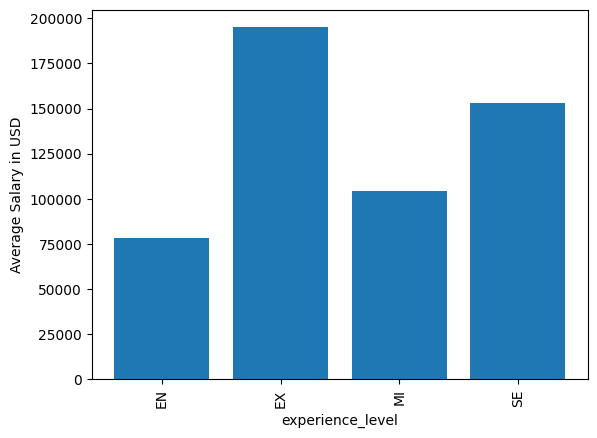

In [15]:
grouped_data = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.bar(grouped_data['experience_level'], grouped_data['salary_in_usd'])
plt.xlabel('experience_level')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

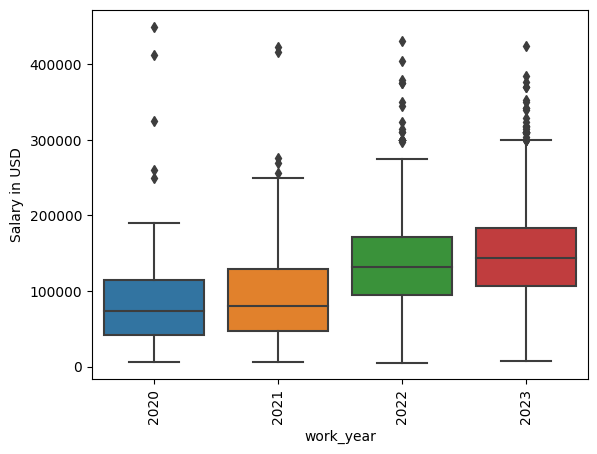

In [16]:
import seaborn as sns

sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.xlabel('work_year')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

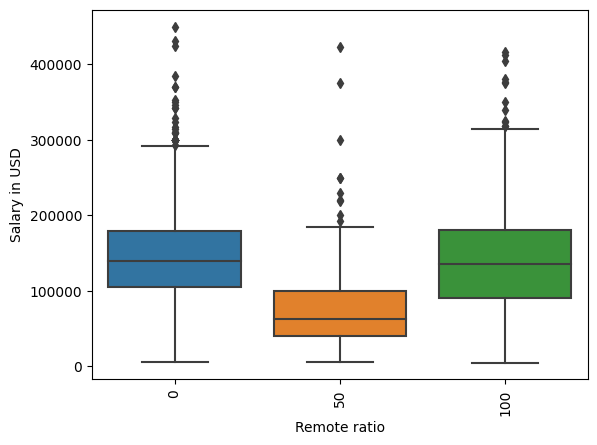

In [17]:
import seaborn as sns

sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.xlabel('Remote ratio')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

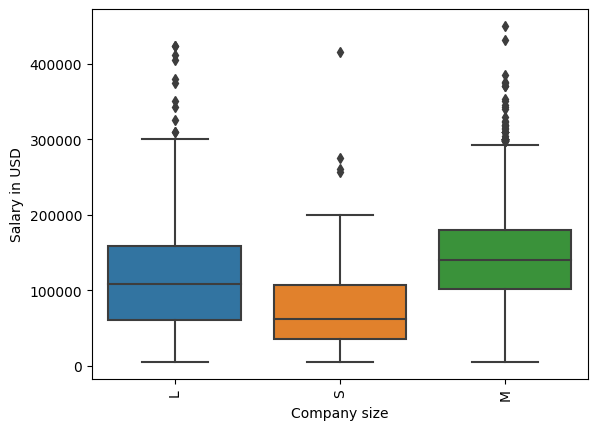

In [18]:
import seaborn as sns

sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.xlabel('Company size')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

In [19]:
top_10_employee_residence  = df['employee_residence'].value_counts().nlargest(10).index.tolist()
df_10_employee_residence  = df[df['employee_residence'].isin(top_10_employee_residence)]
df_10_employee_residence

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [20]:
top_10_employee_residence

['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'PT', 'BR', 'GR']

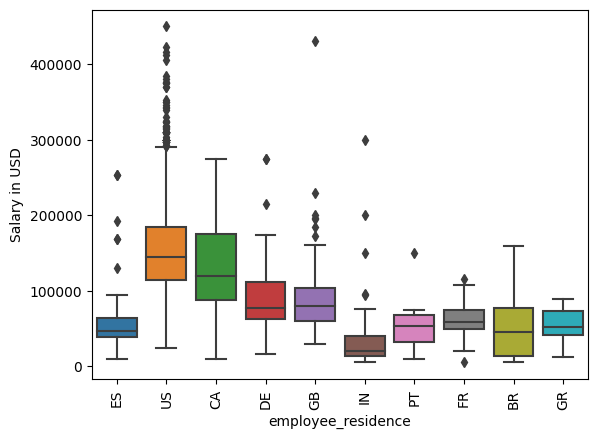

In [21]:
import seaborn as sns

sns.boxplot(x='employee_residence', y='salary_in_usd', data=df_10_employee_residence)
plt.xlabel('employee_residence')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

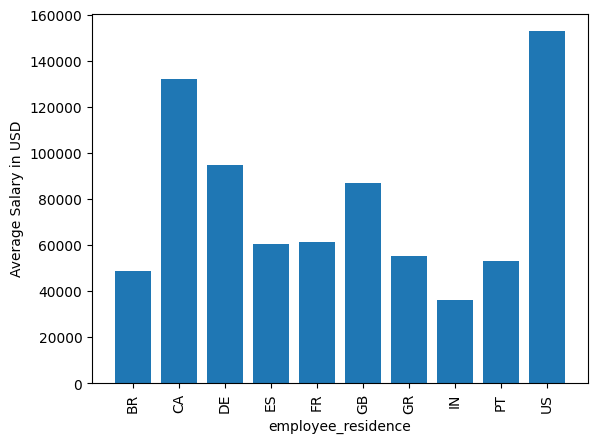

In [22]:
grouped_data = df_10_employee_residence.groupby('employee_residence')['salary_in_usd'].mean().reset_index()

plt.bar(grouped_data['employee_residence'], grouped_data['salary_in_usd'])
plt.xlabel('employee_residence')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

In [23]:
top_10_company_location   = df['company_location'].value_counts().nlargest(10).index.tolist()
df_10_company_location  = df[df['company_location'].isin(top_10_company_location)]
df_10_company_location

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


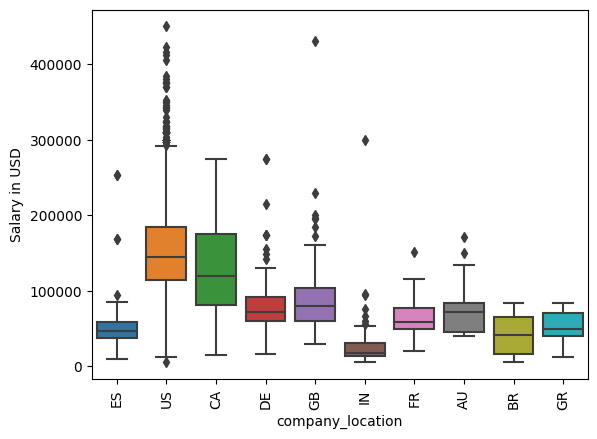

In [24]:
import seaborn as sns

sns.boxplot(x='company_location', y='salary_in_usd', data=df_10_company_location)
plt.xlabel('company_location')
plt.ylabel('Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

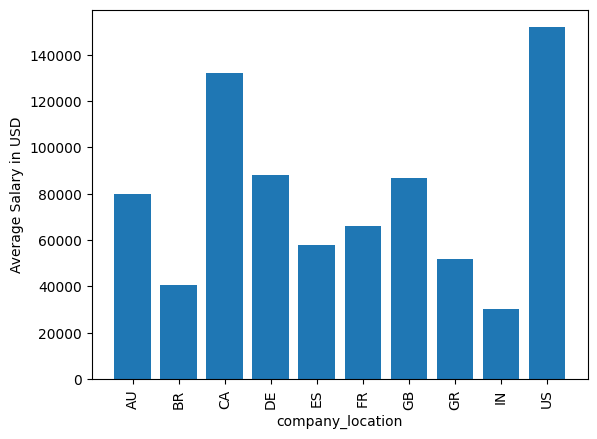

In [26]:
grouped_data = df_10_company_location.groupby('company_location')['salary_in_usd'].mean().reset_index()

plt.bar(grouped_data['company_location'], grouped_data['salary_in_usd'])
plt.xlabel('company_location')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation='vertical')
plt.show()

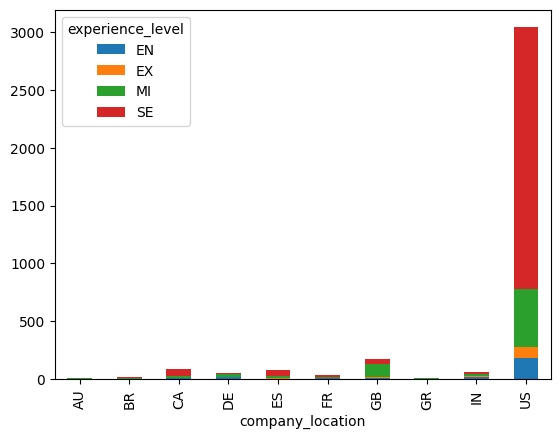

In [27]:
# Create a mosaic plot of two categorical variables
mosaic_data = pd.crosstab(df_10_company_location['company_location'], df_10_company_location['experience_level'])
mosaic_data.plot(kind='bar', stacked=True)
plt.show()

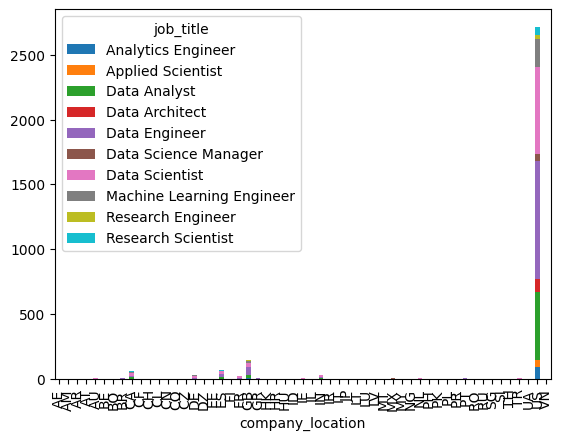

In [29]:
# Create a mosaic plot of two categorical variables
mosaic_data = pd.crosstab(df_10_job_title['company_location'], df_10_job_title['job_title'])
mosaic_data.plot(kind='bar', stacked=True)
plt.show()

In [30]:
top_10_company_location_and_10_job_title   = df_10_job_title['company_location'].value_counts().nlargest(10).index.tolist()
dftop_10_company_location_and_10_job_title= df_10_job_title[df_10_job_title['company_location'].isin(top_10_company_location_and_10_job_title)]
dftop_10_company_location_and_10_job_title

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3742,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


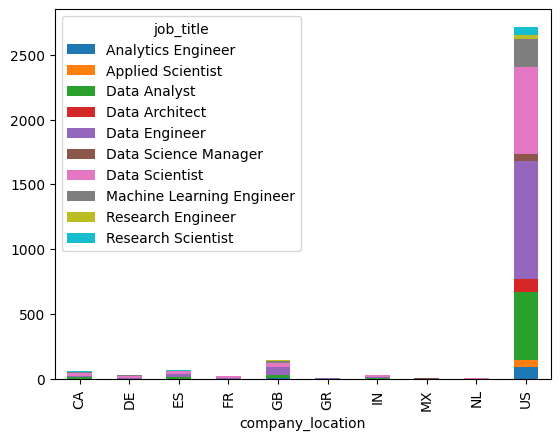

In [31]:
# Create a mosaic plot of two categorical variables
mosaic_data = pd.crosstab(dftop_10_company_location_and_10_job_title['company_location'], dftop_10_company_location_and_10_job_title['job_title'])
mosaic_data.plot(kind='bar', stacked=True)
plt.show()